In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import time

In [2]:
adata = sc.datasets.paul15()

In [3]:
# Select top 1000 highly-variable genes
filter_result = sc.pp.filter_genes_dispersion(adata.X,flavor='cell_ranger',n_top_genes=1000,log=False)
# Subset the genes
adata = adata[:, filter_result.gene_subset]
# Log transformation and scaling
sc.pp.log1p(adata)

C:\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [4]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.diffmap(adata)
sc.tl.dpt(adata)

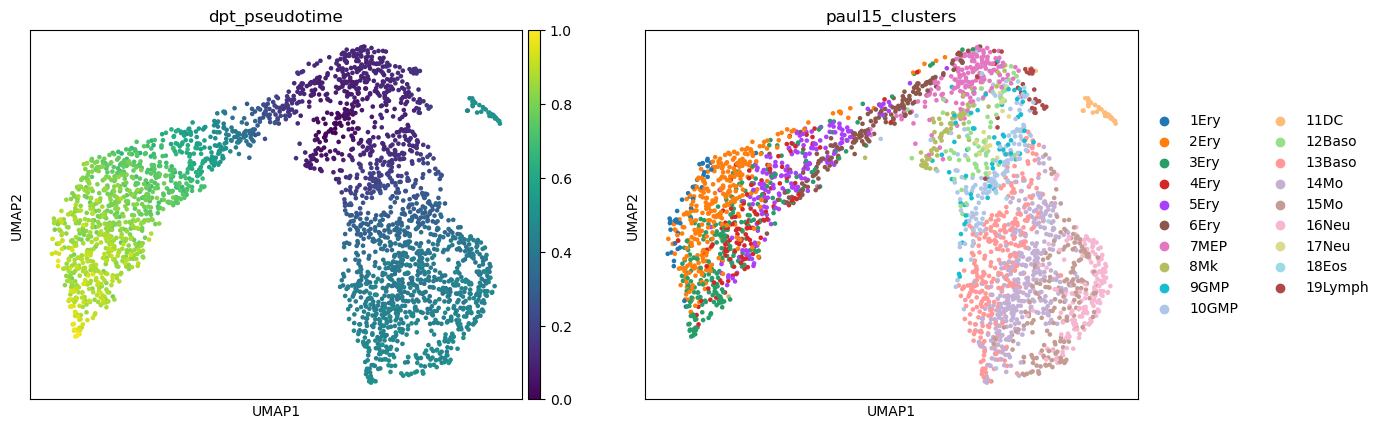

In [5]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['dpt_pseudotime', 'paul15_clusters'])

In [6]:
data_clusters = adata.obs['paul15_clusters']
zip_types = dict(zip(data_clusters.cat.categories,adata.uns['paul15_clusters_colors']))
cell_clusters  =  [zip_types[i] for i in data_clusters.values]

In [7]:
pd.DataFrame(cell_clusters).to_csv("paul.cluster_color.csv")

In [8]:
data_clusters_labels = adata.obs['paul15_clusters'].cat.categories
pd.DataFrame(data_clusters_labels).to_csv("paul.cluster_categories.csv")

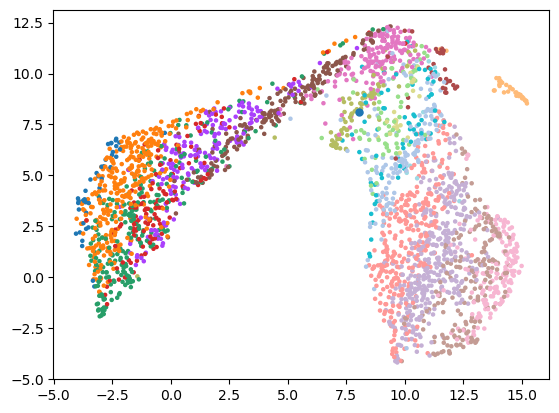

In [9]:
iroot = adata.uns['iroot']
X_umap = adata.obsm['X_umap']
dpt_pseudotime = adata.obs['dpt_pseudotime'].values
iroot = adata.uns['iroot']
plt.scatter(X_umap[:,0],X_umap[:,1],c=cell_clusters,s = 5)
plt.scatter(X_umap[iroot,0],X_umap[iroot,1],s = 25)

In [10]:
pd.DataFrame(dpt_pseudotime).to_csv('paul.dpt_pseudotime.csv')

In [11]:
sc.external.tl.palantir(adata,use_adjacency_matrix=False,n_components=20,knn=10)
pal_res = sc.external.tl.palantir_results(adata,early_cell=adata.obs_names[iroot]) # ,num_waypoints = 2000
pal_res.pseudotime.to_csv('paul.palantir_pseudotime.csv')

Sampling and flocking waypoints...
Time for determining waypoints: 0.0012333353360493978 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.19018979072570802 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9997
Correlation at iteration 2: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [12]:
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline

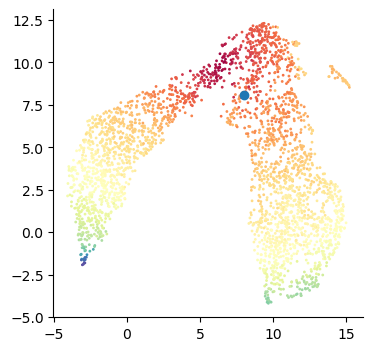

In [13]:
umap = adata.obsm['X_umap']
plt.scatter(umap[:,0], umap[:,1], c=pal_res.pseudotime.values,s=1,cmap='Spectral')
plt.scatter(umap[840,0], umap[840,1])
plt.show()

In [14]:
pal_res.pseudotime.to_csv('paul.palantir_pseudotime.csv')

In [15]:
import phate

Calculating PHATE...
  Running PHATE on 2730 observations and 1002 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.19 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.18 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.43 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.40 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.69 seconds.
  Calculated landmark operator in 2.47 seconds.
  Calculating optimal t...
    Automatically selected t = 12
  Calculated optimal t in 1.83 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.31 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.43 seconds.
Calculated PHATE in 6.47 seconds.


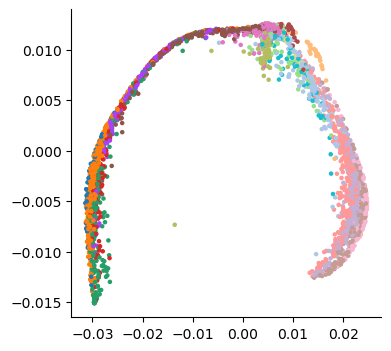

In [16]:
phate_operator = phate.PHATE(knn=30,n_jobs=-2)
Y_phate = phate_operator.fit_transform(adata.X)
plt.scatter(Y_phate[:,0], Y_phate[:,1], c=cell_clusters,s = 5)

In [17]:
pd.DataFrame(Y_phate).to_csv('paul.Y_phate.csv')

The code runs 7s.


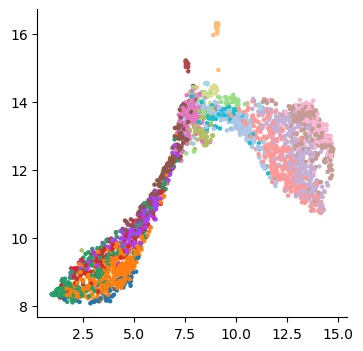

In [18]:
from umap import UMAP
start_time = time.time()
reducer = UMAP() #   
Y_umap = reducer.fit_transform(adata.X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y_umap[:,0],Y_umap[:,1], c=cell_clusters,s = 5)

In [19]:
pd.DataFrame(Y_umap).to_csv('paul.Y_umap.csv')

In [20]:
from sklearn import neighbors, decomposition, manifold

The code runs 11s.


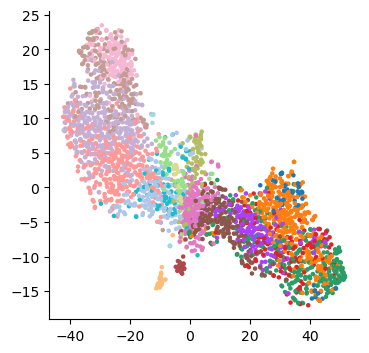

In [21]:
start_time = time.time()
tsne_operator = manifold.TSNE(n_components=2)
Y_tsne = tsne_operator.fit_transform(adata.X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=cell_clusters,s = 5)

In [22]:
pd.DataFrame(Y_tsne).to_csv('paul.Y_tsne.csv')

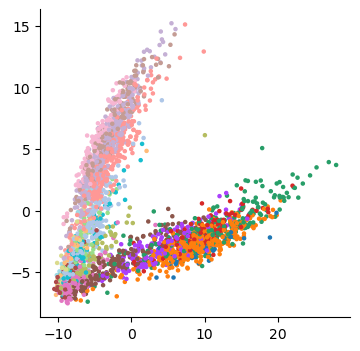

In [23]:
pca_operator = decomposition.PCA(n_components=2)
Y_pca = pca_operator.fit_transform(adata.X)
plt.scatter(Y_pca[:,0],Y_pca[:,1], c=cell_clusters,s = 5)

In [24]:
pd.DataFrame(Y_pca).to_csv('paul.Y_pca.csv')